In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

In [2]:
df=pd.read_csv("/content/drive/MyDrive/academic/EV_DATA.csv")
df.head()

,Vehicle full name,Manufacturing,Model,Top speed (km/hr),Price (INR),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Kerb weight (KG),Range (km/hr),Fast Charging,Drive Type,Number of Seats,boot space (L),Number of Airbags,Type of brakes,Max Torque (N-M),Type of Vehicle
0,Revolt RV400,Revolt Motors,RV400,85.0,134000.0,Electric,Two wheeler,4.0,4.5,108.0,150.0,YES,Belt Drive,2,NaN,NaN,Disc,170.0,Motor cycles
1,Revolt RV300,Revolt Motors,RV300,65.0,94999.0,Electric,Two wheeler,2.7,4.2,101.0,180.0,YES,Hub Drive,2,NaN,NaN,Disc,NaN,Motor cycles
2,Tork Motors(Kratos ),Tork Motors,Kratos,100.0,192499.0,Electric,Two wheeler,4.0,5.0,NaN,180.0,NO,NaN,2,NaN,NaN,Disc,28.0,Motor cycles
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105.0,207499.0,Electric,Two wheeler,4.0,5.0,NaN,180.0,YES,NaN,2,NaN,NaN,Disc,38.0,Motor cycles
4,Oben Rorr,Kabira Mobility,Oben Rorr,100.0,102999.0,Electric,Two wheeler,4.4,2.0,110.0,200.0,YES,Belt Drive,2,NaN,NaN,Disc,NaN,Motor cycles


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle full name        143 non-null    object 
 1   Manufacturing            143 non-null    object 
 2   Model                    143 non-null    object 
 3   Top speed (km/hr)        139 non-null    float64
 4   Price (INR)              128 non-null    float64
 5   Fuel Type                143 non-null    object 
 6   Wheelers type            143 non-null    object 
 7   Battery capacity [kWh]   130 non-null    float64
 8   Full charging time (HR)  112 non-null    float64
 9   Kerb weight (KG)         123 non-null    float64
 10  Range (km/hr)            140 non-null    float64
 11  Fast Charging            143 non-null    object 
 12   Drive Type              115 non-null    object 
 13   Number of Seats         143 non-null    int64  
 14  boot space (L)           8

In [4]:
df.describe()

,Top speed (km/hr),Price (INR),Battery capacity [kWh],Full charging time (HR),Kerb weight (KG),Range (km/hr),Number of Seats,boot space (L),Number of Airbags,Max Torque (N-M)
count,139.000000,1.280000e+02,130.000000,112.000000,123.000000,140.000000,143.000000,85.000000,53.000000,119.000000
mean,129.762590,3.917048e+06,41.355385,7.344911,1506.382114,293.126929,6.538462,425.835294,5.283019,346.749580
std,68.962244,5.822814e+06,44.503370,6.058027,1638.066281,224.634708,8.697393,170.230715,2.396932,423.518356
min,7.000000,3.800000e+04,0.600000,1.000000,6.000000,20.280000,2.000000,135.000000,1.000000,16.000000
25%,80.000000,1.472498e+05,4.400000,4.135000,239.500000,124.750000,2.000000,316.000000,2.000000,115.500000
50%,130.000000,1.271300e+06,36.000000,6.100000,1530.000000,265.000000,5.000000,434.000000,6.000000,252.000000
75%,167.000000,4.157750e+06,63.500000,8.450000,2017.500000,412.750000,5.000000,500.000000,7.000000,395.000000
max,500.000000,2.650000e+07,300.000000,42.000000,16200.000000,1566.000000,44.000000,1290.000000,8.000000,3000.000000


In [5]:
df.columns=df.columns.str.lower()
df.columns

Index(['vehicle full name', 'manufacturing', 'model', 'top speed (km/hr)',
       'price (inr)', 'fuel type', 'wheelers type', 'battery capacity [kwh]',
       'full charging time (hr)', 'kerb weight (kg)', 'range (km/hr)',
       'fast charging', ' drive type', ' number of seats', 'boot space (l)',
       ' number of airbags', 'type of brakes', 'max torque (n-m)',
       'type of vehicle'],
      dtype='object')

In [6]:
df['wheelers type'].unique(),df['fuel type'].unique(),df['fast charging'].unique()

(array(['Two wheeler', 'Three Wheeler', 'Four Wheeler', 'four wheeler',
        'Four wheeler', 'Eight wheeler'], dtype=object),
 array(['Electric', 'electric', 'Hybrid'], dtype=object),
 array(['YES', 'NO', 'No', 'Yes'], dtype=object))

In [7]:
df['wheelers type']=df['wheelers type'].replace('four wheeler','Four Wheeler')
df['wheelers type']=df['wheelers type'].replace('Four wheeler','Four Wheeler')
df['wheelers type']=df['wheelers type'].replace('four wheeler','Four Wheeler')
df['wheelers type']=df['wheelers type'].replace('Two wheeler','Two Wheeler')
df['wheelers type']=df['wheelers type'].replace('Eight wheeler','Eight Wheeler')
df['wheelers type']=df['wheelers type'].replace('electric','Electric')
df['fast charging']=df['fast charging'].replace('NO','No')
df['fast charging']=df['fast charging'].replace('YES','Yes')

In [8]:
def income(price):
    if price <= 100000:
        return 'Low (Thousands)'
    elif price>100000 and price<10000000:
        return 'medium (Lakhs)'
    else:
        return 'High(Crore)'

In [9]:
df['income'] = df['price (inr)'].apply(income)

In [10]:
df.head()

,vehicle full name,manufacturing,model,top speed (km/hr),price (inr),fuel type,wheelers type,battery capacity [kwh],full charging time (hr),kerb weight (kg),range (km/hr),fast charging,drive type,number of seats,boot space (l),number of airbags,type of brakes,max torque (n-m),type of vehicle,income
0,Revolt RV400,Revolt Motors,RV400,85.0,134000.0,Electric,Two Wheeler,4.0,4.5,108.0,150.0,Yes,Belt Drive,2,NaN,NaN,Disc,170.0,Motor cycles,medium (Lakhs)
1,Revolt RV300,Revolt Motors,RV300,65.0,94999.0,Electric,Two Wheeler,2.7,4.2,101.0,180.0,Yes,Hub Drive,2,NaN,NaN,Disc,NaN,Motor cycles,Low (Thousands)
2,Tork Motors(Kratos ),Tork Motors,Kratos,100.0,192499.0,Electric,Two Wheeler,4.0,5.0,NaN,180.0,No,NaN,2,NaN,NaN,Disc,28.0,Motor cycles,medium (Lakhs)
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105.0,207499.0,Electric,Two Wheeler,4.0,5.0,NaN,180.0,Yes,NaN,2,NaN,NaN,Disc,38.0,Motor cycles,medium (Lakhs)
4,Oben Rorr,Kabira Mobility,Oben Rorr,100.0,102999.0,Electric,Two Wheeler,4.4,2.0,110.0,200.0,Yes,Belt Drive,2,NaN,NaN,Disc,NaN,Motor cycles,medium (Lakhs)


In [11]:
df['type of vehicle'].value_counts()

Cars                   89
Scooters               24
Motor cycles           13
Bus                    11
Rickshaws               4
Cargo three wheeler     2
Name: type of vehicle, dtype: int64

Text(0.5, 1.0, 'Type of Vehicle')

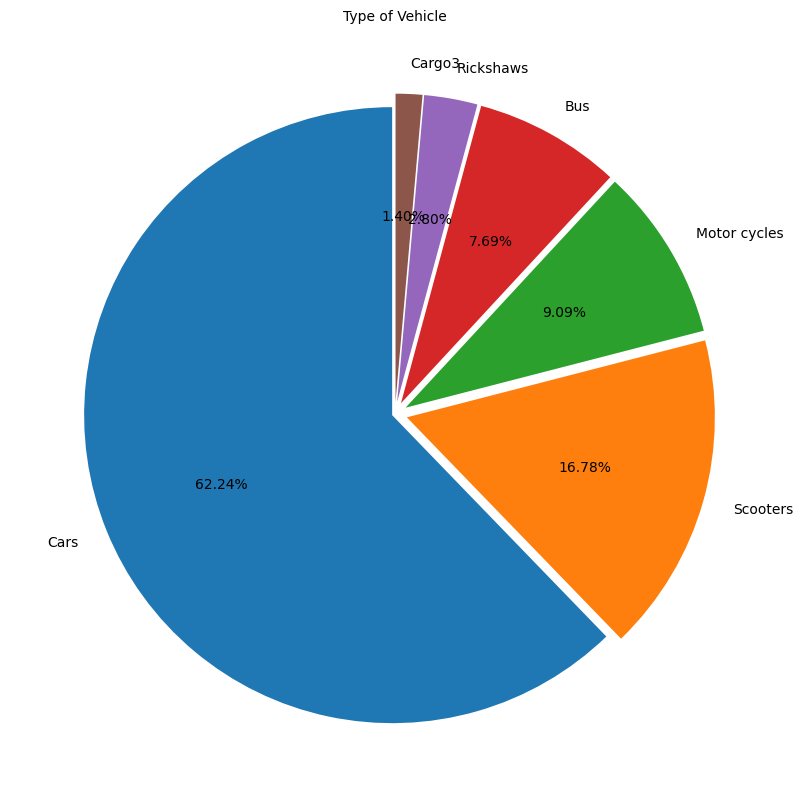

In [12]:
plt.figure(figsize=(10,10))
explode = [0.01,0.04,0.04,0.04,0.04,0.04]
labels=['Cars','Scooters','Motor cycles','Bus','Rickshaws','Cargo3']
plt.pie(df['type of vehicle'].value_counts(),labels=labels,autopct = '%.2f%%',startangle=90,explode=explode)
plt.title('Type of Vehicle', fontsize = 10)

The Above piechart shows percentages of Electrical vehicles types in india. It shows a manufacturing market percentage of every type of vehicle. In that we can see that the market of Cars is high. A lot of EV startup companies are manufacturing or focused on only Electricals Cars. Also there is less market for Cargo and Rickshaws. A very less number of companies are focusing on Cargo and Rickshaws.

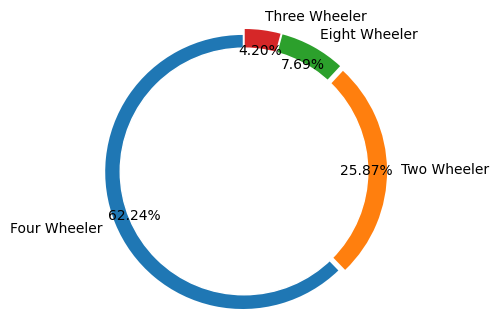

In [13]:
labels=['Four Wheeler','Two Wheeler','Eight Wheeler','Three Wheeler']
sizes = df['wheelers type'].value_counts()


explode = (0.01,0.04,0.04,0.04)
plt.figure(figsize=(4,4))
my_circle = plt.Circle( (0,0), 0.9, color='white')
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

<Axes: >

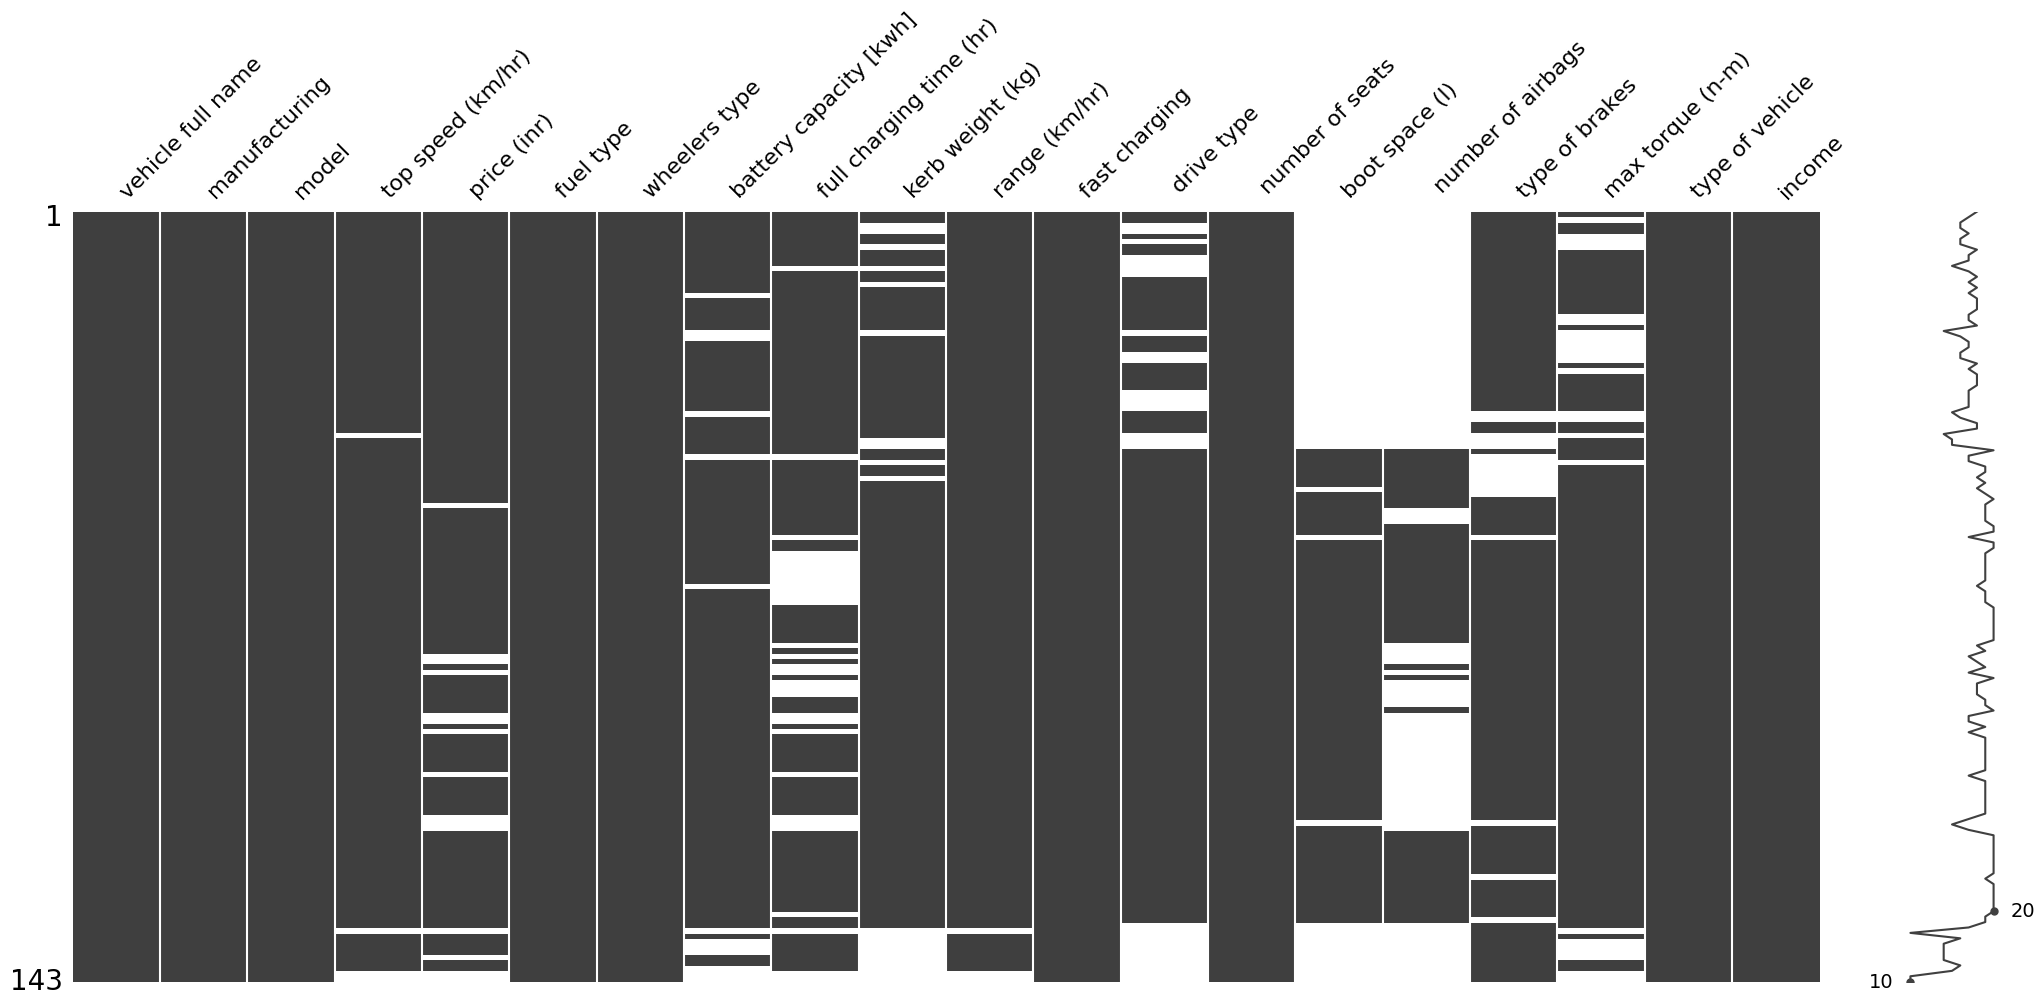

In [14]:
ms.matrix(df)

In [15]:
df['top speed (km/hr)']=df['top speed (km/hr)'].fillna(df['top speed (km/hr)'].mean())
df['price (inr)']=df['price (inr)'].fillna(df['price (inr)'].mean())
df['battery capacity [kwh]']=df['battery capacity [kwh]'].fillna(df['battery capacity [kwh]'].mean())
df['kerb weight (kg)']=df['kerb weight (kg)'].fillna(df['kerb weight (kg)'].mean())
df['max torque (n-m)']=df['max torque (n-m)'].fillna(df['max torque (n-m)'].mean())
df['full charging time (hr)']=df['full charging time (hr)'].fillna(df['full charging time (hr)'].mean())
df['range (km/hr)']=df['range (km/hr)'].fillna(df['range (km/hr)'].mean())
df[' drive type']=df[' drive type'].fillna(df[' drive type'].mode()[0])
df['type of brakes']=df['type of brakes'].fillna(df['type of brakes'].mode()[0])

<Axes: >

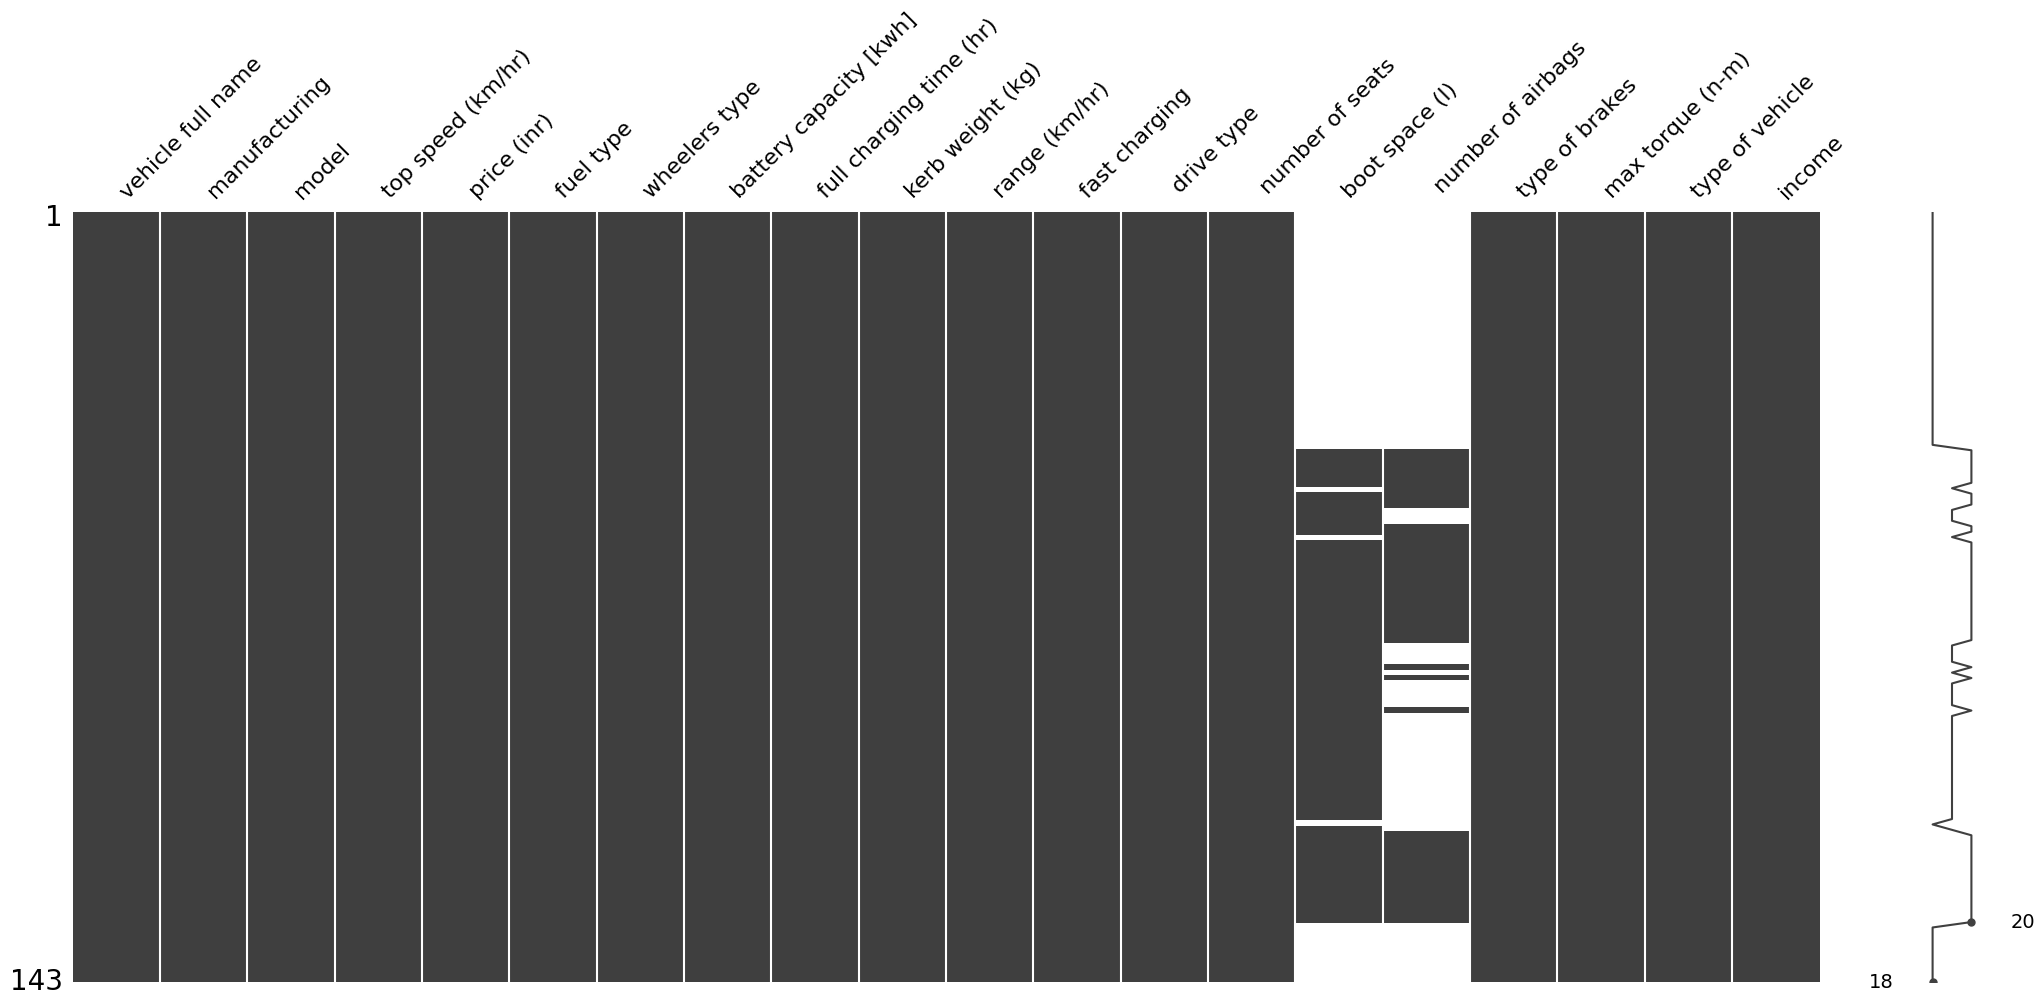

In [16]:
ms.matrix(df)

In [17]:
df.drop(['boot space (l)',' number of airbags'],axis=1,inplace=True)

In [18]:
data=df.drop(['vehicle full name','manufacturing','model','type of vehicle'],axis=1)
data

,top speed (km/hr),price (inr),fuel type,wheelers type,battery capacity [kwh],full charging time (hr),kerb weight (kg),range (km/hr),fast charging,drive type,number of seats,type of brakes,max torque (n-m),income
0,85.00000,1.340000e+05,Electric,Two Wheeler,4.000000,4.500000,108.000000,150.000000,Yes,Belt Drive,2,Disc,170.00000,medium (Lakhs)
1,65.00000,9.499900e+04,Electric,Two Wheeler,2.700000,4.200000,101.000000,180.000000,Yes,Hub Drive,2,Disc,346.74958,Low (Thousands)
2,100.00000,1.924990e+05,Electric,Two Wheeler,4.000000,5.000000,1506.382114,180.000000,No,FWD,2,Disc,28.00000,medium (Lakhs)
3,105.00000,2.074990e+05,Electric,Two Wheeler,4.000000,5.000000,1506.382114,180.000000,Yes,FWD,2,Disc,38.00000,medium (Lakhs)
4,100.00000,1.029990e+05,Electric,Two Wheeler,4.400000,2.000000,110.000000,200.000000,Yes,Belt Drive,2,Disc,346.74958,medium (Lakhs)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,65.00000,3.917048e+06,Electric,Eight Wheeler,250.000000,3.000000,1506.382114,200.000000,Yes,FWD,31,disc (front + rear),346.74958,High(Crore)
139,75.00000,1.600000e+07,Electric,Eight Wheeler,124.000000,2.500000,1506.382114,150.000000,Yes,FWD,31,front disc brakes,3000.00000,High(Crore)
140,70.00000,1.500000e+07,Electric,Eight Wheeler,41.355385,4.500000,1506.382114,300.000000,Yes,FWD,39,disc (front + rear),800.00000,High(Crore)
141,129.76259,3.917048e+06,Electric,Eight Wheeler,41.355385,7.344911,1506.382114,293.126929,Yes,FWD,43,disc (front + rear),346.74958,High(Crore)


In [19]:
from sklearn.preprocessing import LabelEncoder

features =['wheelers type', ' drive type', 'type of brakes','fast charging','income','fuel type' ]

for i in features:
     data[i] =LabelEncoder().fit_transform(data[i])
data.head()

,top speed (km/hr),price (inr),fuel type,wheelers type,battery capacity [kwh],full charging time (hr),kerb weight (kg),range (km/hr),fast charging,drive type,number of seats,type of brakes,max torque (n-m),income
0,85.0,134000.0,0,3,4.0,4.5,108.000000,150.0,1,11,2,1,170.00000,2
1,65.0,94999.0,0,3,2.7,4.2,101.000000,180.0,1,15,2,1,346.74958,1
2,100.0,192499.0,0,3,4.0,5.0,1506.382114,180.0,0,14,2,1,28.00000,2
3,105.0,207499.0,0,3,4.0,5.0,1506.382114,180.0,1,14,2,1,38.00000,2
4,100.0,102999.0,0,3,4.4,2.0,110.000000,200.0,1,11,2,1,346.74958,2


Text(0, 0.5, 'Counts')

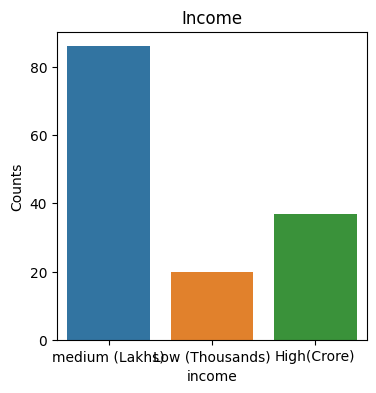

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(x='income',data=df)
plt.title('Income')
plt.ylabel('Counts')

Above plot shows information about Incomefeature. we categorized Income features in three different types as, first in Low means the price of EV is in thousands(Less than 1 lakhs), second in Medium means the price of EV is in lakhs (Between 1 lakh to 1 crore) and Third in High means the price of EV is in crore (Greater than 1 crore). As from the above countplot we can conclude that the maximum EV’s price is in lakhs (Medium).

<Axes: xlabel='price (inr)', ylabel='full charging time (hr)'>

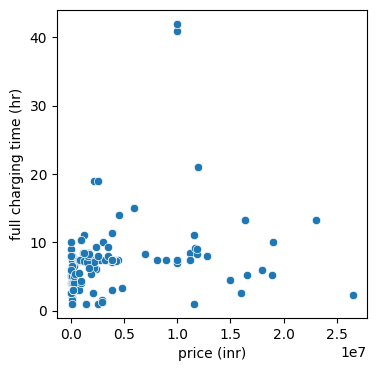

In [21]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='price (inr)',y='full charging time (hr)',data=df)

<Axes: xlabel='price (inr)', ylabel='top speed (km/hr)'>

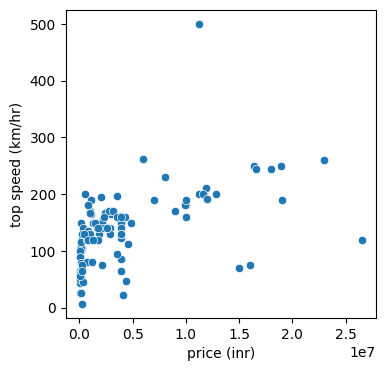

In [22]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='price (inr)',y='top speed (km/hr)',data=df)

Above scatter plot between Top speed vs Price shows the relation between them. As from this scatter plot ,we can conclude that if the Top Speed of EV is increasing then the Price of EV is also increasing.

<Axes: xlabel='battery capacity [kwh]', ylabel='top speed (km/hr)'>

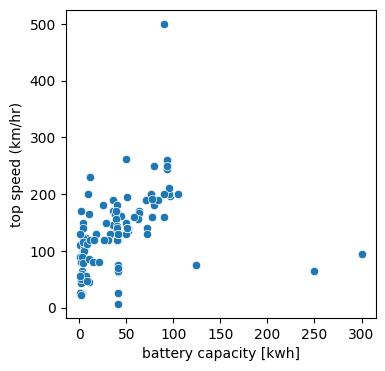

In [23]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='battery capacity [kwh]',y='top speed (km/hr)',data=df)

<Axes: xlabel='income', ylabel='top speed (km/hr)'>

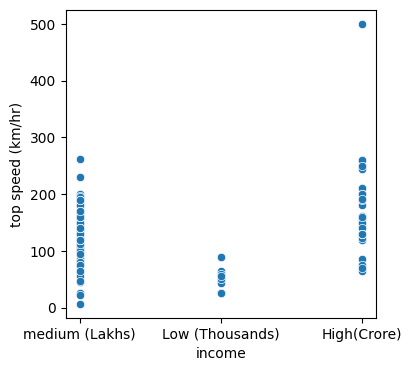

In [24]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='income',y='top speed (km/hr)',data=df)

This figure shows a relationship between Income and Top speed. We can see that if the price of EV in Low (thousands) then your top speed lies within 0-110 km/hr. As the price increases your vehicle's top speed also increases

array([[<Axes: title={'center': 'top speed (km/hr)'}>,
        <Axes: title={'center': 'price (inr)'}>,
        <Axes: title={'center': 'battery capacity [kwh]'}>],
       [<Axes: title={'center': 'full charging time (hr)'}>,
        <Axes: title={'center': 'kerb weight (kg)'}>,
        <Axes: title={'center': 'range (km/hr)'}>],
       [<Axes: title={'center': ' number of seats'}>,
        <Axes: title={'center': 'max torque (n-m)'}>, <Axes: >]],
      dtype=object)

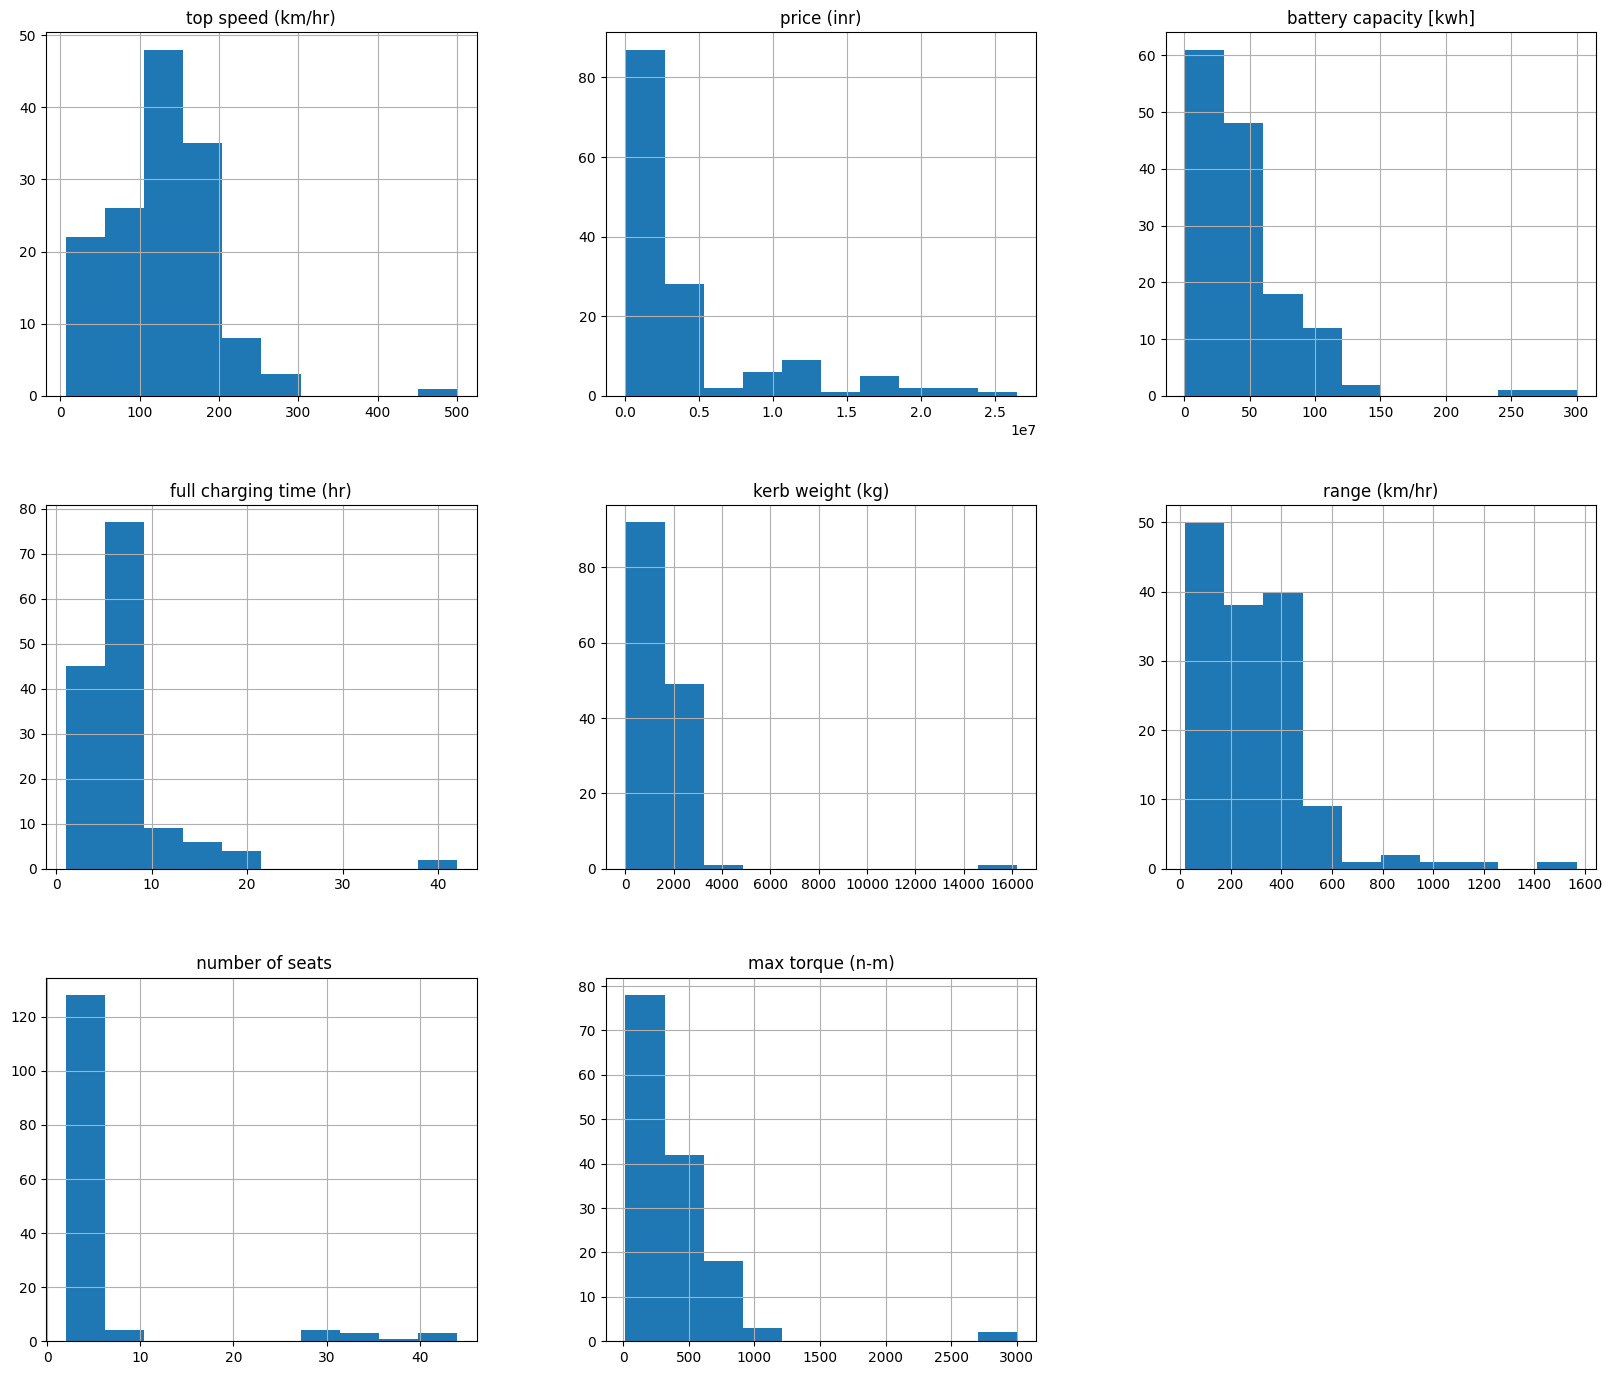

In [25]:
plt.rcParams['figure.figsize']=(20,17)
df.hist()

In the above figure we plot histograms of every single feature. As from that we can see that mostly Price ranges between thousands to lakhs. In Top speed maximum average value is around 150km/hr, same as for Battery capacity ranges around 0-50Kwh. As a Kerb weight it averages at 0-2000kg. Most EVhas Range between 0-100km/hr. For boot space we can conclude that most EVs have 300 liter boot space. Also for maximum Torque and number of Seats, we can see torque lies between 0-400 and average EVs have 5 seats

In [26]:
df.columns

Index(['vehicle full name', 'manufacturing', 'model', 'top speed (km/hr)',
       'price (inr)', 'fuel type', 'wheelers type', 'battery capacity [kwh]',
       'full charging time (hr)', 'kerb weight (kg)', 'range (km/hr)',
       'fast charging', ' drive type', ' number of seats', 'type of brakes',
       'max torque (n-m)', 'type of vehicle', 'income'],
      dtype='object')

<Axes: >

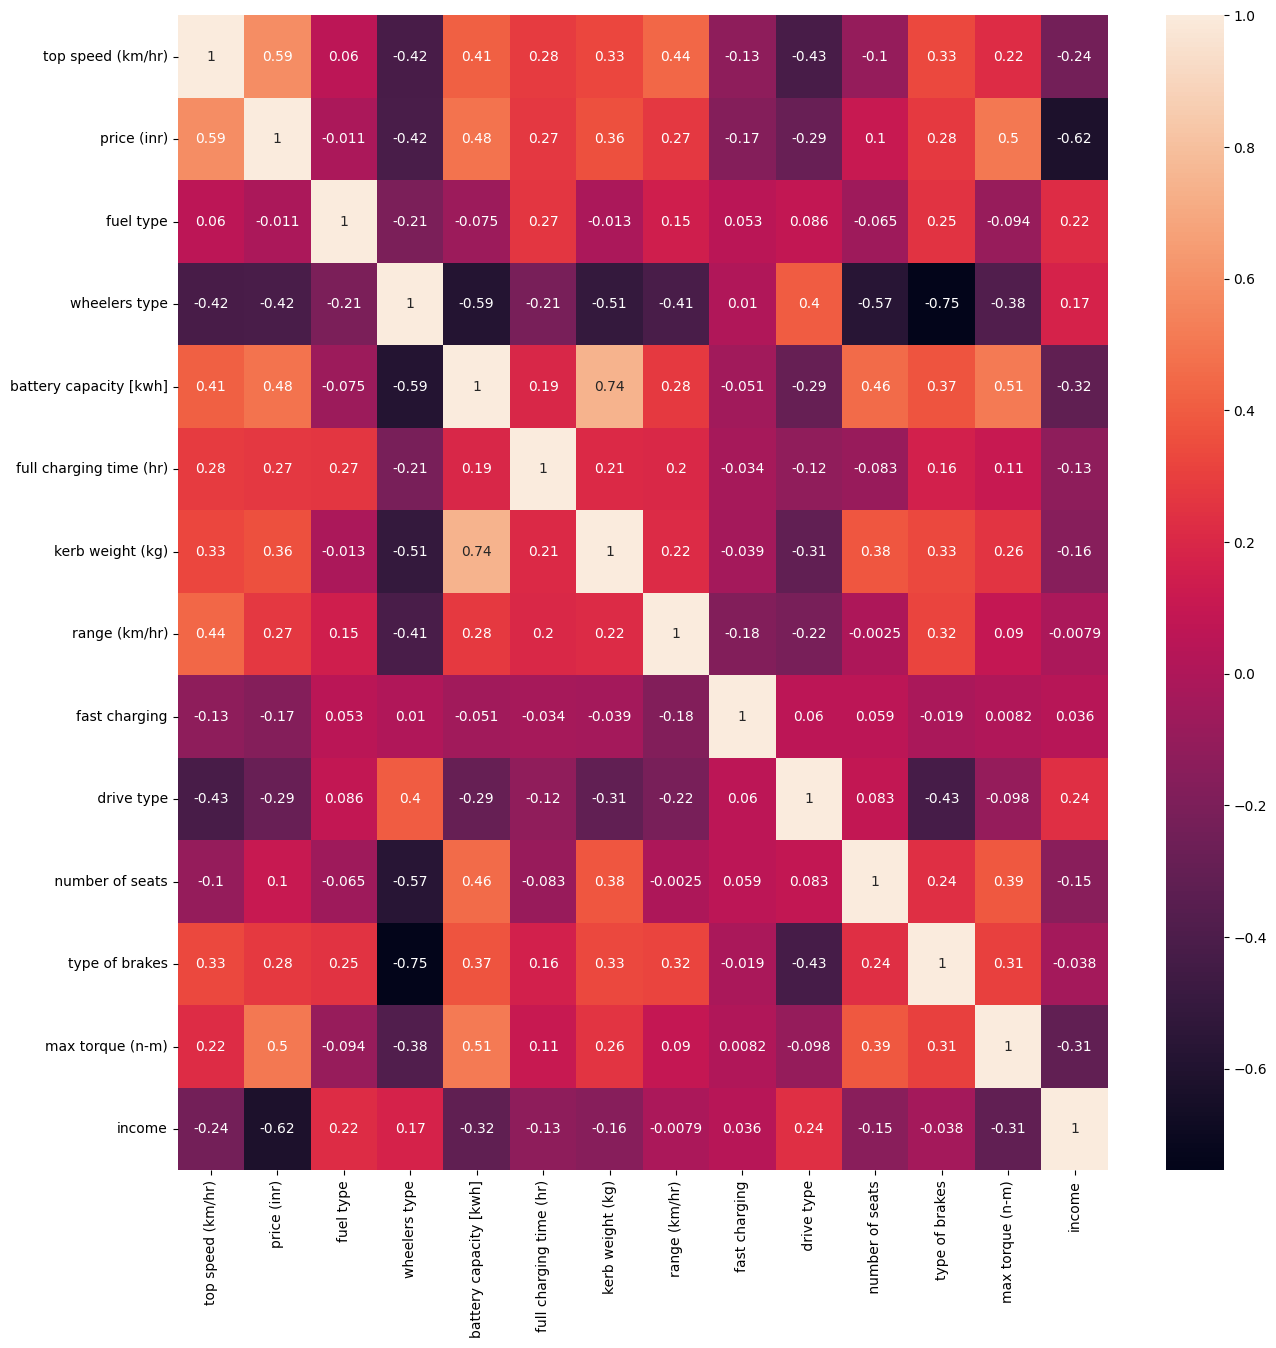

In [27]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(data.corr(),annot=True)

Above figure shows the correlation between every individual variable. We can see that Kerb weight and Battery capacity have the highest correlation. Meaning if we want more battery capacity our EV weight will increase.

In [29]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data = preprocessing.scale(data)
pca = PCA(n_components=13)
pc = pca.fit_transform(data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13',]
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,-3.783048e+06,-1029.114955,-12.410636,-82.569933,-3.933696,-2.244695,-1.717157,-1.850204,1.939151,-0.643147,-0.896204,0.199218,-0.181537
1,-3.822049e+06,-1027.513498,163.245472,-40.712233,-24.122401,-8.445163,-2.979298,-1.646913,-1.645520,-0.988593,0.231793,0.233427,-0.116584
2,-3.724549e+06,359.788955,-190.134316,-95.931203,-2.292819,-22.363318,-0.889148,-1.460744,-2.266723,-0.737820,-0.627942,0.033200,-0.344254
3,-3.709549e+06,358.565954,-180.768848,-94.894594,2.704178,-23.094158,-0.712145,-1.465563,-2.361653,-0.742032,-0.569764,0.087744,-0.212191
4,-3.814049e+06,-1018.647764,160.536166,-17.919478,8.788227,-9.749235,-1.584130,-4.530731,1.173048,-0.736696,-0.826798,0.307383,-0.166691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-6.998109e-04,1.530194,15.288049,-94.246688,-40.170635,215.091203,5.417449,-0.722299,-0.583851,0.320894,0.117408,0.194304,0.042612
139,1.208295e+07,-1140.818788,2270.240800,-87.645465,-76.134164,-5.075762,2.251072,-4.297404,-0.288384,1.064707,0.461053,-0.181031,-0.823643
140,1.108295e+07,-1092.331759,97.186181,-95.099674,-125.378196,-10.054475,28.545471,1.319693,2.932414,-0.308681,-0.402550,0.001149,-0.085141
141,5.636534e-06,0.080636,0.343592,-0.074933,-1.372222,3.013893,35.671645,6.512884,3.418897,-1.240167,0.523346,0.107938,-0.298480


In [30]:
pca.explained_variance_ratio_

array([9.99999928e-01, 6.64303292e-08, 3.65063168e-09, 1.48425717e-09,
       8.45916820e-11, 1.87252993e-11, 1.64106148e-12, 8.16454399e-13,
       5.54971072e-13, 2.06164657e-14, 1.08690425e-14, 6.33187485e-15,
       2.95663669e-15])

In [31]:
loadings = pca.components_
num_pc = pca.n_features_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

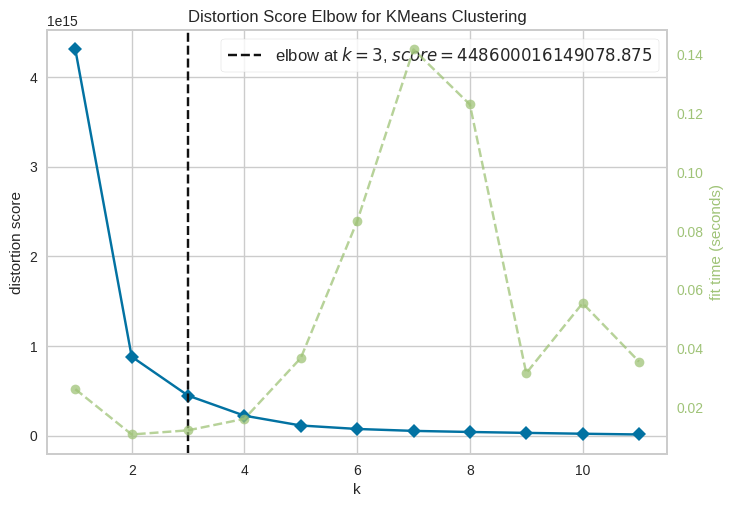

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data)
visualizer.show()

In [33]:
kmeans = KMeans(n_clusters=3)
data_predict = kmeans.fit_predict(data)
data_predict.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(143,)

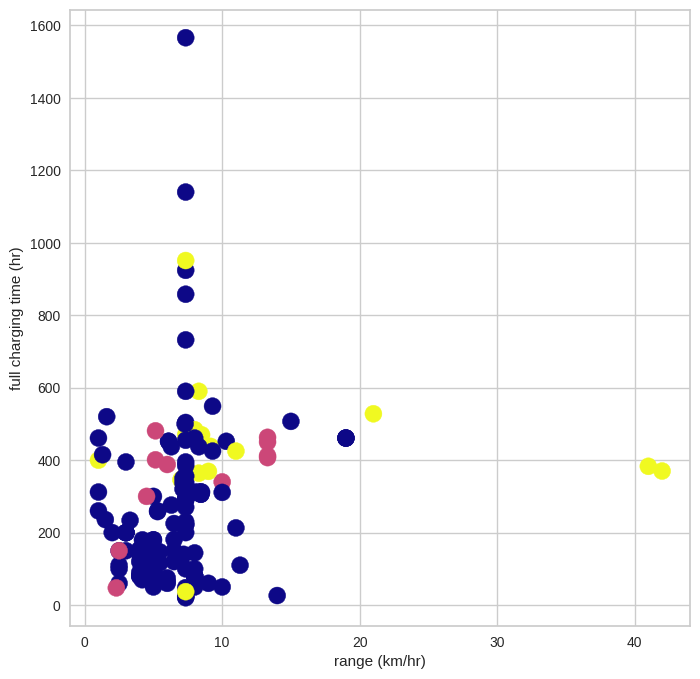

In [34]:
plt.figure(figsize=(8,8))
plt.scatter( y ='range (km/hr)' ,x = 'full charging time (hr)', data = df , c = data_predict , s =150,cmap='plasma' )
plt.xlabel('range (km/hr)')
plt.ylabel('full charging time (hr)')
plt.show()

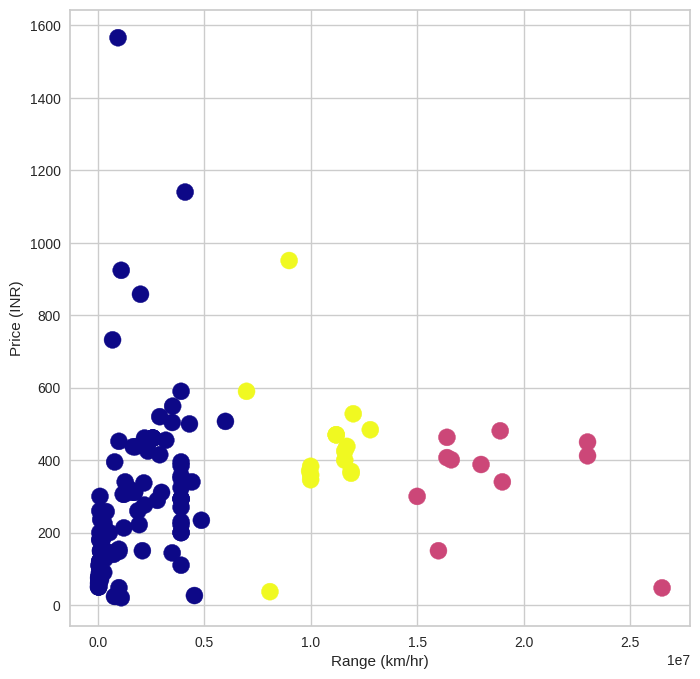

In [35]:
plt.figure(figsize=(8,8))
plt.scatter( y ='range (km/hr)' ,x = 'price (inr)', data = df , c = data_predict , s =150,cmap='plasma' )
plt.xlabel('Range (km/hr)')
plt.ylabel('Price (INR)')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 1 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 1
 2 1 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0]
448360851302906.94
2
[[ 1.11457331e+02  1.56394721e+06  2.32758621e-01  1.61206897e+00
   3.30772812e+01  6.53355680e+00  1.29911634e+03  2.68049145e+02
   9.65517241e-01  1.20603448e+01  6.37068966e+00  1.78448276e+00
   2.56777499e+02  1.56896552e+00]
 [ 2.01363636e+02  1.89818182e+07  9.09090909e-02  8.18181818e-01
   8.06868531e+01  8.07272727e+00  2.29964967e+03  3.49040909e+02
   8.18181818e-01  1.01818182e+01  1.02727273e+01  2.18181818e+00
   9.03636364e+02 -4.44089210e-16]
 [ 2.13250000e+02  1.06200000e+07  2.50000000e-01  1.00000000e+00
   7.43312500e+01  1.27268527e+01  2.46368750e+03  4.36500000e+02
   8.12500000e-01  8.68750000e+00  5.18750000e+00  2.00000000e+00
   6.16187500e+02  6.250

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 116, 2: 16, 1: 11})

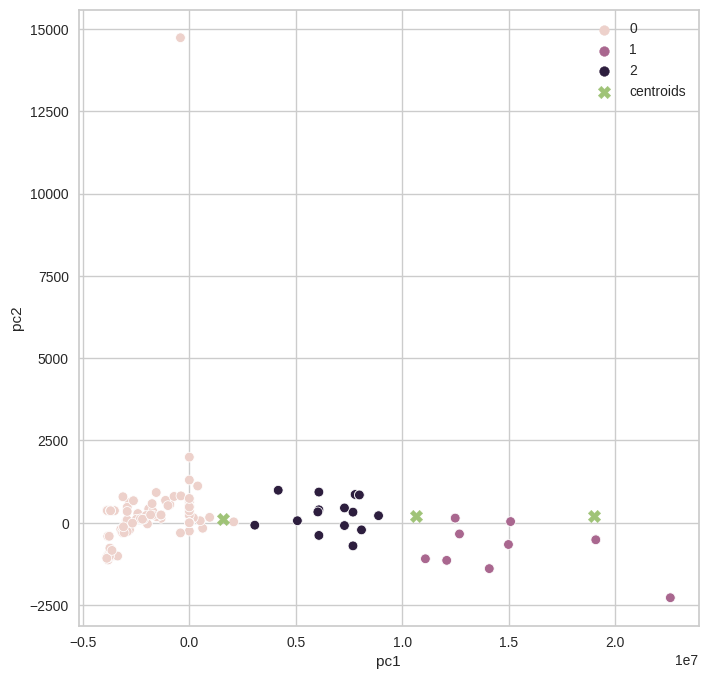

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],marker="X", c="g", s=80, label="centroids")
plt.legend()

In the above figure we create 3 clusters by using K-Means Clustering and visualize for better understanding with Centroids.



In [40]:
df['fuel type']

0      Electric
1      Electric
2      Electric
3      Electric
4      Electric
         ...   
138    Electric
139    Electric
140    Electric
141    Electric
142    Electric
Name: fuel type, Length: 143, dtype: object

In [41]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
attr =pd.crosstab(df['cluster_num'],df['fuel type'])
attr1 = attr[['Electric','Hybrid']]
attr1

fuel type,Electric,Hybrid
cluster_num,,
0,97,11
1,10,1
2,13,2


In [42]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
attr =pd.crosstab(df['cluster_num'],df['type of vehicle'])
attr2 = attr[['Motor cycles', 'Scooters', 'Rickshaws', 'Cargo three wheeler','Cars', 'Bus']]
attr2

type of vehicle,Motor cycles,Scooters,Rickshaws,Cargo three wheeler,Cars,Bus
cluster_num,,,,,,
0,13,24,4,2,64,9
1,0,0,0,0,9,2
2,0,0,0,0,16,0


In [43]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
attr =pd.crosstab(df['cluster_num'],df[' number of seats'])
attr3 = attr[[ 2,  4,  6,  5,  7, 44, 30, 31, 40, 35, 39, 43]]
attr3

number of seats,2,4,6,5,7,44,30,31,40,35,39,43
cluster_num,,,,,,,,,,,,
0,39,9,2,55,2,1,1,2,1,3,0,1
1,0,2,0,7,0,0,0,1,0,0,1,0
2,0,1,0,13,2,0,0,0,0,0,0,0


In [44]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
attr =pd.crosstab(df['cluster_num'],df['manufacturing'])
attr4 = attr[['Revolt Motors', 'Tork Motors', 'Kabira Mobility','Kabira Mobility KM 4000', 'SVM Prana', 'Earth Energy ',' Earth Energy', 'Ultraviolette Automotive', 'Emflux Motors','Ather Energy', 'Bajaj ', 'Simple Energy', 'Hero Electric','Okinawa Praise', 'Yakuza Rubie', 'Lactrix Motors', 'Evolet Pony','Omjay Eeve', 'Battre loev', 'BattRE Electric', 'PURE EV ','Ampere', 'Ola', 'TVS', 'Amo Mobility', 'Lectrix EV','Entice Impex', 'Lohia', 'Mahindra ', 'Kerala Automobiles','Omega Seiki Mobility', 'Ele ', 'Tata', 'MG ZS', 'Hyundai','Jaguar', 'Audi ', 'E6', 'Mercedes-Benz', 'BMW ', 'Mahindra','Mercedes Benz', 'Pravaig Dynamics', 'MG', 'Toyota', 'Honda','MG ', 'Maruti Suzuki', 'Maruti Suzuki ', 'Toyota ', 'Volvo','BMW', 'Audi', 'Citroen', 'Kia', 'MIni', 'Nissan', 'Opel','Peugeot', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Volkswagen','Citroën', 'BYD', 'Tesla', 'Ashok Leyland', 'JBM Auto Limited\xa0','Tata Motors', 'Olectra Greentech Limited\xa0','Deccan Auto Limited\xa0\xa0', 'Eicher Motors Limited\xa0']]
attr4

manufacturing,Revolt Motors,Tork Motors,Kabira Mobility,Kabira Mobility KM 4000,SVM Prana,Earth Energy,Earth Energy,Ultraviolette Automotive,Emflux Motors,Ather Energy,...,Volkswagen,Citroën,BYD,Tesla,Ashok Leyland,JBM Auto Limited,Tata Motors,Olectra Greentech Limited,Deccan Auto Limited,Eicher Motors Limited
cluster_num,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,1,2,1,1,1,1,2,...,4,1,1,1,1,1,5,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
attr =pd.crosstab(df['cluster_num'],df['income'])
attr5 = attr[['medium (Lakhs)', 'Low (Thousands)', 'High(Crore)']]
attr5

income,medium (Lakhs),Low (Thousands),High(Crore)
cluster_num,,,
0,81,20,15
1,0,0,11
2,5,0,11


In [46]:
df['fuel type']= LabelEncoder().fit_transform(df['fuel type'])
Fuel_Type = df.groupby('cluster_num')['fuel type'].mean()
Fuel_Type = Fuel_Type.to_frame().reset_index()
Fuel_Type

,cluster_num,fuel type
0,0,0.232759
1,1,0.090909
2,2,0.250000


In [47]:
df['type of vehicle']= LabelEncoder().fit_transform(df['type of vehicle'])
Type_of_Vehicle = df.groupby('cluster_num')['type of vehicle'].mean()
Type_of_Vehicle = Type_of_Vehicle.to_frame().reset_index()
Type_of_Vehicle

,cluster_num,type of vehicle
0,0,2.629310
1,1,1.636364
2,2,2.000000


In [48]:
df[' number of seats']= LabelEncoder().fit_transform(df[' number of seats'])
Number_of_Seats= df.groupby('cluster_num')[' number of seats'].mean()
Number_of_Seats = Number_of_Seats.to_frame().reset_index()
Number_of_Seats

,cluster_num,number of seats
0,0,1.732759
1,1,2.727273
2,2,2.187500


In [49]:
df['income']= LabelEncoder().fit_transform(df['income'])
Income= df.groupby('cluster_num')['income'].mean()
Income = Income.to_frame().reset_index()
Income

,cluster_num,income
0,0,1.568966
1,1,0.000000
2,2,0.625000


In [50]:
Full_charging_time=df.groupby('cluster_num')['full charging time (hr)'].mean()
Full_charging_time=Full_charging_time.to_frame().reset_index()
Full_charging_time

,cluster_num,full charging time (hr)
0,0,6.533557
1,1,8.072727
2,2,12.726853


In [51]:
ranges=df.groupby('cluster_num')['range (km/hr)'].mean()
ranges=ranges.to_frame().reset_index()
ranges

,cluster_num,range (km/hr)
0,0,268.049145
1,1,349.040909
2,2,436.500000


In [52]:
segment = Income.merge(Type_of_Vehicle, on='cluster_num', how='left').merge(Fuel_Type, on='cluster_num',how='left').merge(ranges,on='cluster_num', how='left').merge(Full_charging_time, on='cluster_num', how='left')
segment

,cluster_num,income,type of vehicle,fuel type,range (km/hr),full charging time (hr)
0,0,1.568966,2.629310,0.232759,268.049145,6.533557
1,1,0.000000,1.636364,0.090909,349.040909,8.072727
2,2,0.625000,2.000000,0.250000,436.500000,12.726853


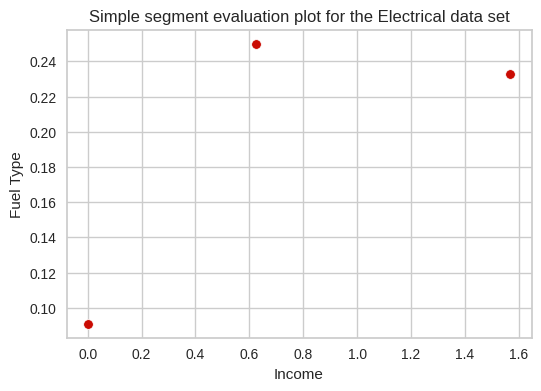

In [53]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = "income", y = "fuel type",data=segment, color="r")
plt.title("Simple segment evaluation plot for the Electrical data set")
plt.xlabel("Income")
plt.ylabel("Fuel Type")
plt.show()

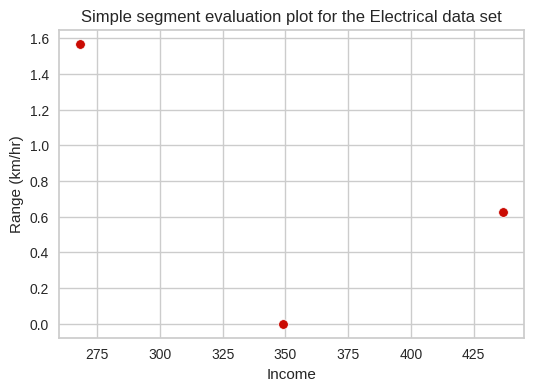

In [54]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = "range (km/hr)", y = "income",data=segment, color="r")
plt.title("Simple segment evaluation plot for the Electrical data set")
plt.xlabel("Income")
plt.ylabel("Range (km/hr)")
plt.show()

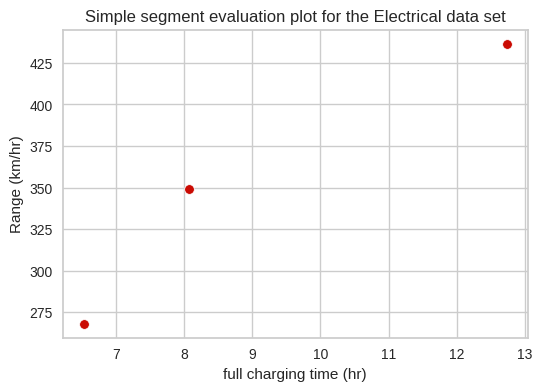

In [55]:
plt.figure(figsize = (6,4))
sns.scatterplot(x ='full charging time (hr)' , y ="range (km/hr)",data=segment, color="r")
plt.title("Simple segment evaluation plot for the Electrical data set")
plt.xlabel("full charging time (hr)")
plt.ylabel("Range (km/hr)")
plt.show()